In [7]:
import pandas as pd
import spacy
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# 1. Load the cleaned, deduplicated data
df = pd.read_csv('reddit_clean_data.csv')

# 2. Load spaCy model
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# 3. Define tokenization & lemmatization function
def tokenize_lemmatize(text):
    doc = nlp(text)
    return [
        token.lemma_ for token in doc
        if token.is_alpha and token.lemma_ not in ENGLISH_STOP_WORDS
    ]

# 4. Apply to all posts
df['tokens'] = df['clean_text'].apply(tokenize_lemmatize)

# 5. Drop any posts that became empty after tokenization
df = df[df['tokens'].map(len) > 0].reset_index(drop=True)

# 6. Save tokenized data
df.to_csv('reddit_tokenized.csv', index=False)
print(f"Tokenized data saved to 'reddit_tokenized.csv' ({len(df)} posts)")


Tokenized data saved to 'reddit_tokenized.csv' (43098 posts)


In [4]:
import pandas as pd
import spacy
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if not already present
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# 1. Load the cleaned, deduplicated data
df = pd.read_csv('reddit_clean_data.csv')

# 2. Load spaCy model
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# 3. Get NLTK English stopwords
nltk_stopwords = set(stopwords.words('english'))

# 4. Define tokenization & lemmatization function with NLTK stopwords
def tokenize_lemmatize(text):
    # Handle NaN values by converting to string
    if pd.isna(text):
        return []
    
    # Convert to string to handle any non-string types
    text = str(text)
    
    # Skip empty or very short strings
    if len(text.strip()) < 2:
        return []
    
    doc = nlp(text)
    return [
        token.lemma_ for token in doc
        if token.is_alpha and token.lemma_.lower() not in nltk_stopwords
    ]

# 5. Apply to all posts
df['tokens'] = df['clean_text'].apply(tokenize_lemmatize)

# 6. Drop any posts that became empty after tokenization
df = df[df['tokens'].map(len) > 0].reset_index(drop=True)

# 7. Save tokenized data
df.to_csv('reddit_tokenizeddemo.csv', index=False)
print(f"Tokenized data saved to 'reddit_tokenizeddemo.csv' ({len(df)} posts)")

/var/folders/xr/wnl4swlj3hl1vcftpb0gnzb80000gn/T/ipykernel_746/190345780.py:13: DtypeWarning: Columns (7,11,12,13,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('reddit_clean_data.csv')


Tokenized data saved to 'reddit_tokenizeddemo.csv' (43106 posts)


In [5]:
# Let's inspect the data to understand the issue with created_utc column
print("📊 Inspecting Data Structure...")
print(f"DataFrame shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\n🔍 First 5 rows of created_utc column:")
print(df['created_utc'].head())
print(f"\nData type of created_utc: {df['created_utc'].dtype}")

# Check for non-numeric values in created_utc
print(f"\n🚨 Checking for problematic values in created_utc...")
# Find rows where created_utc is not numeric
try:
    # Try to convert to numeric to find problem rows
    numeric_utc = pd.to_numeric(df['created_utc'], errors='coerce')
    problem_rows = df[numeric_utc.isna()]
    print(f"Found {len(problem_rows)} rows with non-numeric created_utc values")
    if len(problem_rows) > 0:
        print("\nFirst few problematic values:")
        print(problem_rows[['created_utc']].head())
except Exception as e:
    print(f"Error checking created_utc: {e}")

# Check unique values in created_utc column (first 10)
print(f"\nFirst 10 unique values in created_utc:")
print(df['created_utc'].unique()[:10])

📊 Inspecting Data Structure...
DataFrame shape: (43106, 19)
Columns: ['id', 'created_utc', 'subreddit', 'listing', 'title', 'selftext', 'url', 'num_comments', 'comments', 'raw_text', 'clean_text', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'tokens']

🔍 First 5 rows of created_utc column:
0    2025-07-13T07:45:14
1    2025-07-13T07:43:55
2    2025-07-13T07:42:44
3    2025-07-13T07:29:13
4    2025-07-13T07:27:48
Name: created_utc, dtype: object

Data type of created_utc: object

🚨 Checking for problematic values in created_utc...
Found 43106 rows with non-numeric created_utc values

First few problematic values:
           created_utc
0  2025-07-13T07:45:14
1  2025-07-13T07:43:55
2  2025-07-13T07:42:44
3  2025-07-13T07:29:13
4  2025-07-13T07:27:48

First 10 unique values in created_utc:
['2025-07-13T07:45:14' '2025-07-13T07:43:55' '2025-07-13T07:42:44'
 '2025-07-13T07:29:13' '2025-07-13T07:27:48' '2025-07-13T07:26:09'
 '2025-0

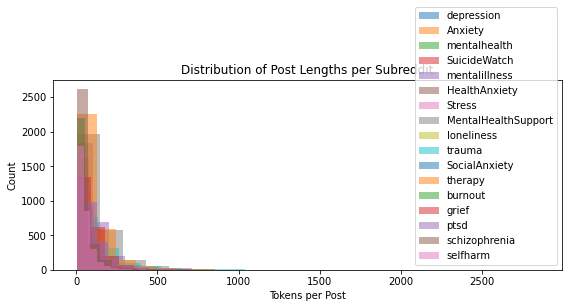

In [10]:
df['post_length'] = df['tokens'].apply(eval).apply(len)
plt.figure(figsize=(8,4))
for sub in df['subreddit'].unique():
    lengths = df[df['subreddit']==sub]['post_length']
    plt.hist(lengths, bins=20, alpha=0.5, label=sub)
plt.title("Distribution of Post Lengths per Subreddit")
plt.xlabel("Tokens per Post")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()


In [14]:
import numpy as np

df['comment_length'] = df['comments'].fillna('').apply(lambda x: len(str(x).split()))
avg_comment_length = df.groupby('subreddit')['comment_length'].mean()
print(avg_comment_length)


subreddit
Anxiety                430.320599
HealthAnxiety          821.121212
MentalHealthSupport    162.164104
SocialAnxiety          412.742964
Stress                 173.863909
SuicideWatch           311.160445
burnout                 89.753175
depression             338.759557
grief                  248.097445
loneliness             129.382353
mentalhealth           503.698054
mentalillness          241.090435
ptsd                   701.476206
schizophrenia          316.300717
selfharm               274.749921
therapy                393.618076
trauma                  77.316718
Name: comment_length, dtype: float64


Using column: proc_text
Available columns: ['id', 'created_utc', 'subreddit', 'listing', 'title', 'selftext', 'url', 'num_comments', 'comments', 'raw_text', 'clean_text', 'clean2', 'labels2', 'tokens2', 'proc_text']
Extracting trigrams...
Found 262958 unique trigrams
Extracting quadgrams...
Found 262958 unique trigrams
Extracting quadgrams...
Found 380978 unique quadgrams
Found 380978 unique quadgrams


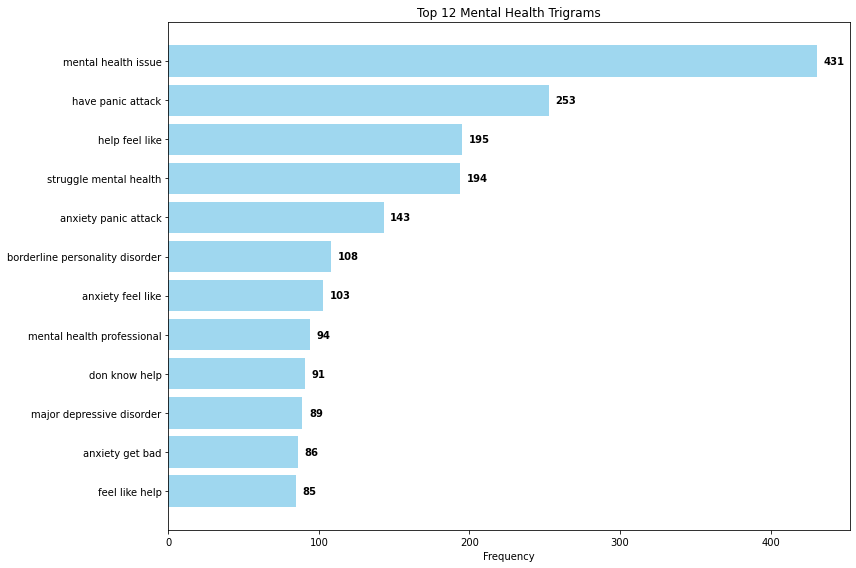


Top 5 Mental Health Trigrams:
1. mental health issue (431)
2. have panic attack (253)
3. help feel like (195)
4. struggle mental health (194)
5. anxiety panic attack (143)


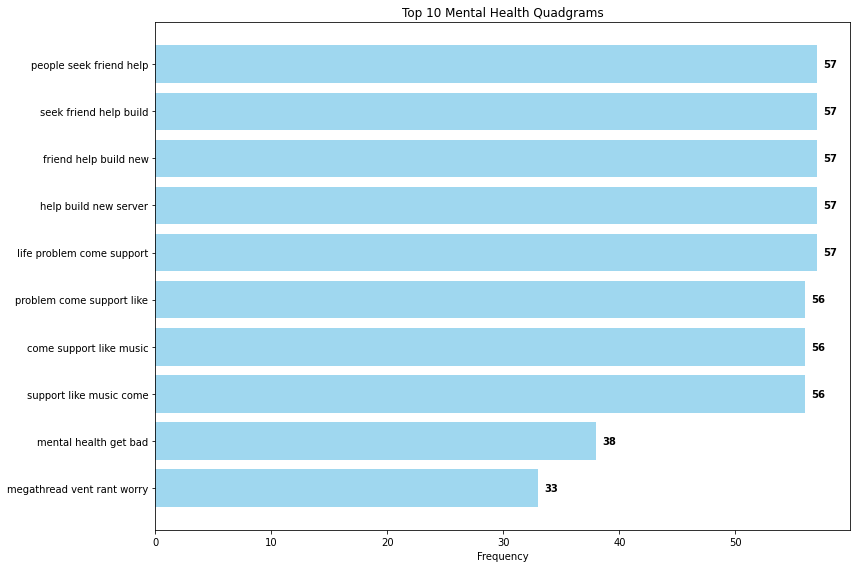


Top 5 Mental Health Quadgrams:
1. people seek friend help (57)
2. seek friend help build (57)
3. friend help build new (57)
4. help build new server (57)
5. life problem come support (57)


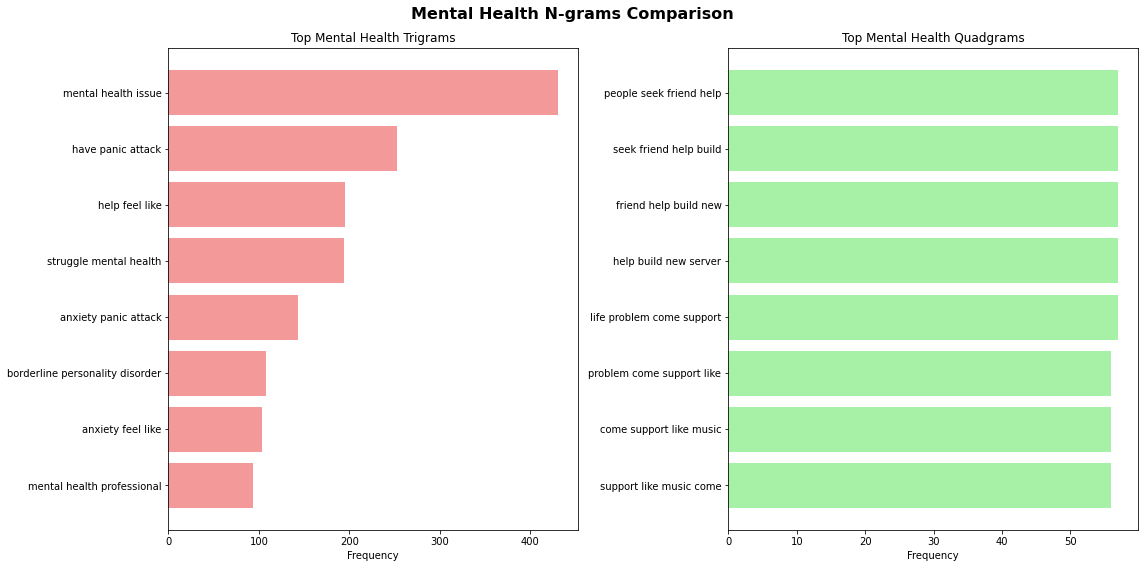


✅ Analysis complete!


In [ ]:
# Simple Mental Health Trigrams and Quadgrams Analysis
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
from nltk.util import ngrams
import re

# Mental health keywords
mh_words = [
    'anxiety', 'anxious', 'depression', 'depressed', 'stress', 'stressed',
    'panic', 'worry', 'fear', 'mental', 'health', 'therapy', 'therapist',
    'sad', 'lonely', 'help', 'support', 'cope', 'suicide', 'suicidal',
    'ptsd', 'trauma', 'bipolar', 'disorder', 'medication', 'treatment'
]

# Use the existing dataframe and specify the text column directly
text_col = 'proc_text'  

print(f"Using column: {text_col}")
print(f"Available columns: {list(df.columns)}")

# Function to extract mental health n-grams
def get_mh_ngrams(texts, n=3):
    all_ngrams = []
    
    for text in texts.dropna():
        if isinstance(text, str) and len(text) > 10:
            # Clean and tokenize
            words = re.sub(r'[^a-z\s]', ' ', text.lower()).split()
            words = [w for w in words if len(w) > 2]
            
            # Generate n-grams
            for ngram in ngrams(words, n):
                ngram_text = ' '.join(ngram)
                # Check if contains mental health words
                if any(mh_word in ngram_text for mh_word in mh_words):
                    all_ngrams.append(ngram_text)
    
    return Counter(all_ngrams)

# Extract trigrams and quadgrams
print("Extracting trigrams...")
trigrams = get_mh_ngrams(df[text_col], n=3)
print(f"Found {len(trigrams)} unique trigrams")

print("Extracting quadgrams...")
quadgrams = get_mh_ngrams(df[text_col], n=4)
print(f"Found {len(quadgrams)} unique quadgrams")

# Plot function
def plot_ngrams(ngram_counter, title, top_n=10):
    if not ngram_counter:
        print(f"No {title} found!")
        return
    
    # Get top n-grams
    top_items = ngram_counter.most_common(top_n)
    if not top_items:
        print(f"No {title} with sufficient frequency!")
        return
    
    ngrams_list, frequencies = zip(*top_items)
    
    # Create plot
    plt.figure(figsize=(12, 8))
    y_pos = range(len(ngrams_list))
    
    bars = plt.barh(y_pos, frequencies, color='skyblue', alpha=0.8)
    plt.yticks(y_pos, ngrams_list)
    plt.xlabel('Frequency')
    plt.title(f'Top {len(ngrams_list)} {title}')
    plt.gca().invert_yaxis()
    
    # Add frequency labels
    for i, freq in enumerate(frequencies):
        plt.text(freq + max(frequencies)*0.01, i, str(freq), 
                va='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Print top 5
    print(f"\nTop 5 {title}:")
    for i, (ngram, freq) in enumerate(top_items[:5], 1):
        print(f"{i}. {ngram} ({freq})")

# Plot trigrams
plot_ngrams(trigrams, "Mental Health Trigrams", top_n=12)

# Plot quadgrams  
plot_ngrams(quadgrams, "Mental Health Quadgrams", top_n=10)

# Create comparison plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Trigrams
top_tri = trigrams.most_common(8)
if top_tri:
    tri_names, tri_freqs = zip(*top_tri)
    ax1.barh(range(len(tri_names)), tri_freqs, color='lightcoral', alpha=0.8)
    ax1.set_yticks(range(len(tri_names)))
    ax1.set_yticklabels(tri_names)
    ax1.set_xlabel('Frequency')
    ax1.set_title('Top Mental Health Trigrams')
    ax1.invert_yaxis()

# Quadgrams
top_quad = quadgrams.most_common(8)
if top_quad:
    quad_names, quad_freqs = zip(*top_quad)
    ax2.barh(range(len(quad_names)), quad_freqs, color='lightgreen', alpha=0.8)
    ax2.set_yticks(range(len(quad_names)))
    ax2.set_yticklabels(quad_names)
    ax2.set_xlabel('Frequency')
    ax2.set_title('Top Mental Health Quadgrams')
    ax2.invert_yaxis()

plt.suptitle('Mental Health N-grams Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n Analysis complete!")

📏 ANALYZING POST LENGTHS...
📊 Post Length Statistics:
   Total posts with content: 43,217
   Average words per post: 180.1
   Median words per post: 116
   Shortest post: 1 words
   Longest post: 6527 words
📊 Post Length Statistics:
   Total posts with content: 43,217
   Average words per post: 180.1
   Median words per post: 116
   Shortest post: 1 words
   Longest post: 6527 words


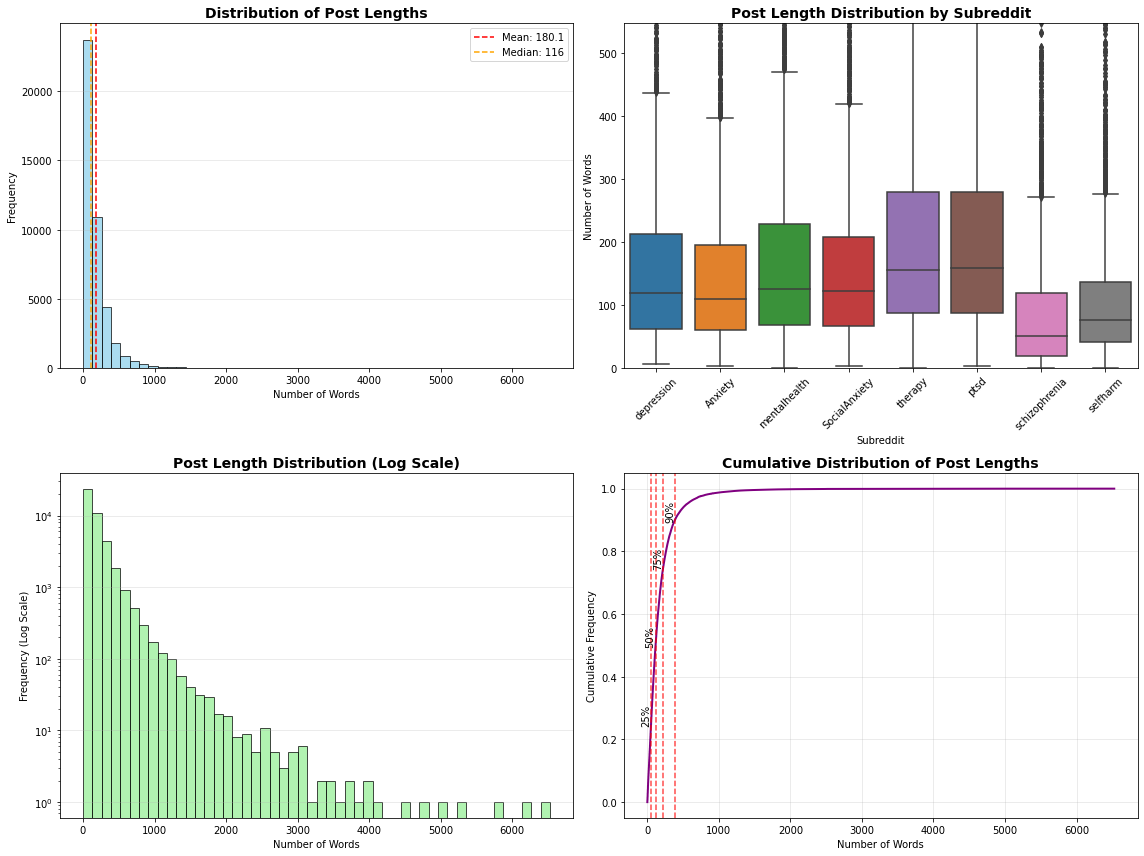

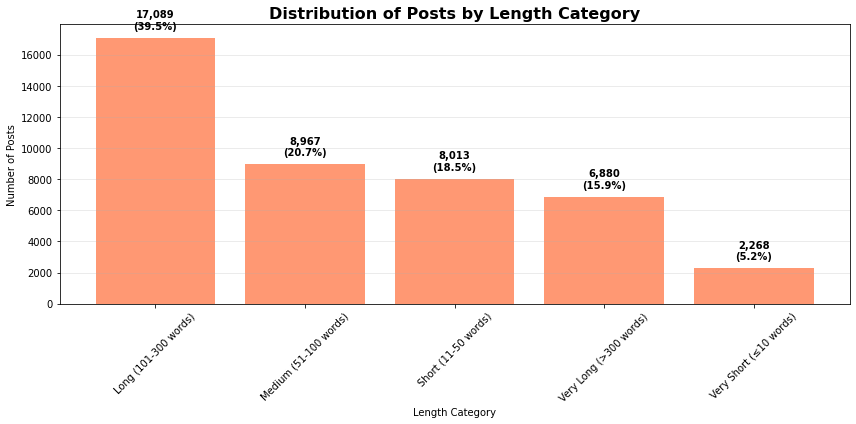


📈 Length Category Distribution:
   Long (101-300 words): 17,089 posts (39.5%)
   Medium (51-100 words): 8,967 posts (20.7%)
   Short (11-50 words): 8,013 posts (18.5%)
   Very Long (>300 words): 6,880 posts (15.9%)
   Very Short (≤10 words): 2,268 posts (5.2%)


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from textstat import flesch_reading_ease, flesch_kincaid_grade
import re

# 1. POST LENGTH ANALYSIS
print("📏 ANALYZING POST LENGTHS...")

# Calculate word counts for different text fields
df['title_word_count'] = df['title'].fillna('').apply(lambda x: len(str(x).split()))
df['selftext_word_count'] = df['selftext'].fillna('').apply(lambda x: len(str(x).split()))
df['total_word_count'] = df['title_word_count'] + df['selftext_word_count']

# Remove posts with 0 words (likely deleted or empty posts)
df_content = df[df['total_word_count'] > 0].copy()

print(f"📊 Post Length Statistics:")
print(f"   Total posts with content: {len(df_content):,}")
print(f"   Average words per post: {df_content['total_word_count'].mean():.1f}")
print(f"   Median words per post: {df_content['total_word_count'].median():.0f}")
print(f"   Shortest post: {df_content['total_word_count'].min()} words")
print(f"   Longest post: {df_content['total_word_count'].max()} words")

# Create comprehensive post length visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histogram of post lengths
axes[0, 0].hist(df_content['total_word_count'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(df_content['total_word_count'].mean(), color='red', linestyle='--', 
                   label=f'Mean: {df_content["total_word_count"].mean():.1f}')
axes[0, 0].axvline(df_content['total_word_count'].median(), color='orange', linestyle='--', 
                   label=f'Median: {df_content["total_word_count"].median():.0f}')
axes[0, 0].set_title('Distribution of Post Lengths', fontweight='bold', fontsize=14)
axes[0, 0].set_xlabel('Number of Words')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# 2. Box plot of post lengths by subreddit (top 8 subreddits)
top_subreddits = df_content['subreddit'].value_counts().head(8).index
df_top_subs = df_content[df_content['subreddit'].isin(top_subreddits)]

sns.boxplot(data=df_top_subs, x='subreddit', y='total_word_count', ax=axes[0, 1])
axes[0, 1].set_title('Post Length Distribution by Subreddit', fontweight='bold', fontsize=14)
axes[0, 1].set_xlabel('Subreddit')
axes[0, 1].set_ylabel('Number of Words')
axes[0, 1].tick_params(axis='x', rotation=45)
axes[0, 1].set_ylim(0, df_content['total_word_count'].quantile(0.95))  # Remove extreme outliers

# 3. Log-scale histogram for better visualization
axes[1, 0].hist(df_content['total_word_count'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].set_yscale('log')
axes[1, 0].set_title('Post Length Distribution (Log Scale)', fontweight='bold', fontsize=14)
axes[1, 0].set_xlabel('Number of Words')
axes[1, 0].set_ylabel('Frequency (Log Scale)')
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Cumulative distribution
sorted_lengths = np.sort(df_content['total_word_count'])
cumulative_freq = np.arange(1, len(sorted_lengths) + 1) / len(sorted_lengths)
axes[1, 1].plot(sorted_lengths, cumulative_freq, linewidth=2, color='purple')
axes[1, 1].set_title('Cumulative Distribution of Post Lengths', fontweight='bold', fontsize=14)
axes[1, 1].set_xlabel('Number of Words')
axes[1, 1].set_ylabel('Cumulative Frequency')
axes[1, 1].grid(True, alpha=0.3)

# Add percentile lines
for percentile in [25, 50, 75, 90]:
    value = np.percentile(df_content['total_word_count'], percentile)
    axes[1, 1].axvline(value, color='red', linestyle='--', alpha=0.7)
    axes[1, 1].text(value, percentile/100, f'{percentile}%', rotation=90, ha='right')

plt.tight_layout()
plt.show()

# Length categories analysis
def categorize_length(word_count):
    if word_count <= 10:
        return 'Very Short (≤10 words)'
    elif word_count <= 50:
        return 'Short (11-50 words)'
    elif word_count <= 100:
        return 'Medium (51-100 words)'
    elif word_count <= 300:
        return 'Long (101-300 words)'
    else:
        return 'Very Long (>300 words)'

df_content['length_category'] = df_content['total_word_count'].apply(categorize_length)
length_dist = df_content['length_category'].value_counts()

plt.figure(figsize=(12, 6))
bars = plt.bar(length_dist.index, length_dist.values, color='coral', alpha=0.8)
plt.title('Distribution of Posts by Length Category', fontweight='bold', fontsize=16)
plt.xlabel('Length Category')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)

# Add percentage labels on bars
total_posts = len(df_content)
for bar, count in zip(bars, length_dist.values):
    percentage = (count / total_posts) * 100
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + total_posts*0.01, 
             f'{count:,}\n({percentage:.1f}%)', ha='center', va='bottom', fontweight='bold')

plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n📈 Length Category Distribution:")
for category, count in length_dist.items():
    percentage = (count / total_posts) * 100
    print(f"   {category}: {count:,} posts ({percentage:.1f}%)")


😊 ANALYZING SENTIMENT DISTRIBUTION...
🔄 Computing sentiment scores...
🔄 Computing sentiment scores...

📊 Sentiment Distribution:
   Neutral: 22,996 posts (53.2%)
   Positive: 11,360 posts (26.3%)
   Negative: 8,861 posts (20.5%)

📊 Sentiment Distribution:
   Neutral: 22,996 posts (53.2%)
   Positive: 11,360 posts (26.3%)
   Negative: 8,861 posts (20.5%)


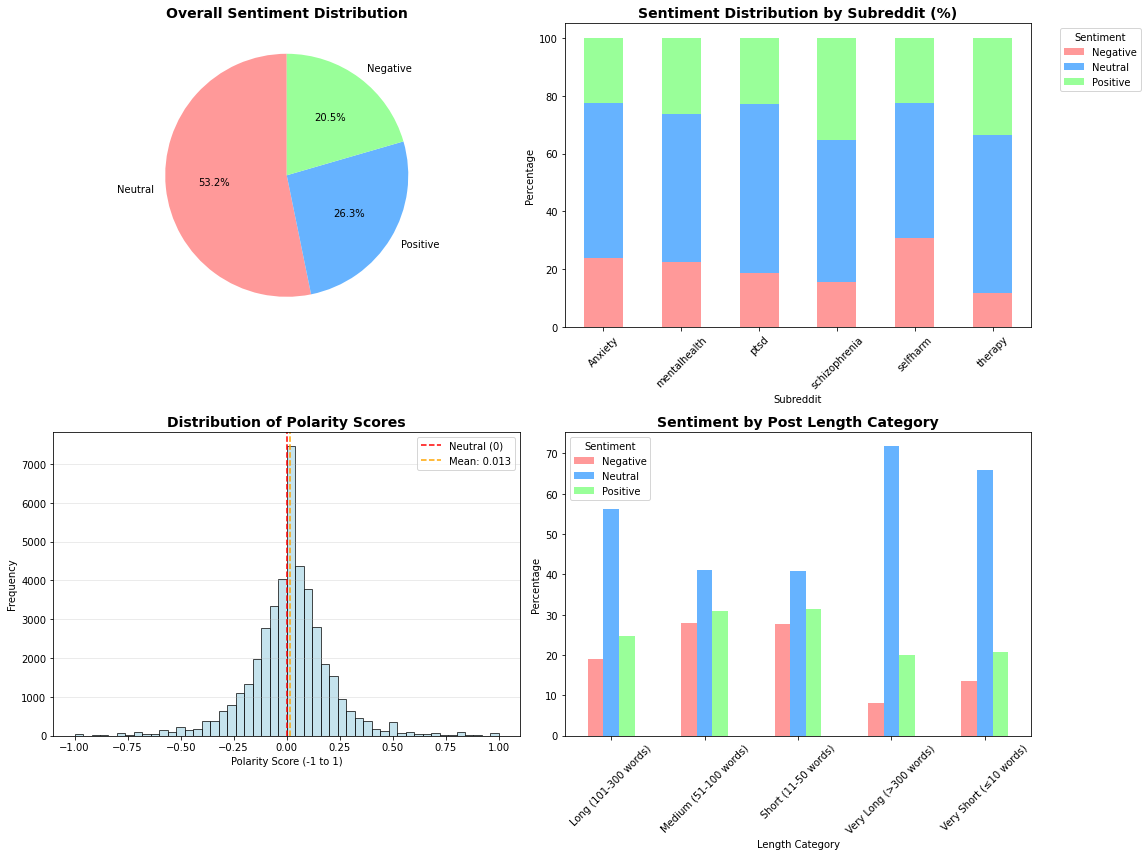


🔍 Sentiment Insights:
   Average polarity: 0.013
   Average subjectivity: 0.488
   Most positive subreddit: schizophrenia
   Most negative subreddit: selfharm


In [ ]:
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

# 2. SENTIMENT ANALYSIS
print("\n😊 ANALYZING SENTIMENT DISTRIBUTION...")

# Function to get sentiment using TextBlob
def get_sentiment(text):
    if pd.isna(text) or text == '':
        return 0, 0  # neutral sentiment for empty text
    try:
        blob = TextBlob(str(text))
        return blob.sentiment.polarity, blob.sentiment.subjectivity
    except:
        return 0, 0

# Analyse sentiment for title + selftext combined
df_content['combined_text'] = (df_content['title'].fillna('') + ' ' + 
                              df_content['selftext'].fillna('')).str.strip()

# Get sentiment scores
print("🔄 Computing sentiment scores...")
sentiment_results = df_content['combined_text'].apply(get_sentiment)
df_content['polarity'] = [x[0] for x in sentiment_results]
df_content['subjectivity'] = [x[1] for x in sentiment_results]

# Categorise sentiment
def categorize_sentiment(polarity):
    if polarity > 0.1:
        return 'Positive'
    elif polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df_content['sentiment_category'] = df_content['polarity'].apply(categorize_sentiment)

# Sentiment distribution
sentiment_dist = df_content['sentiment_category'].value_counts()
sentiment_percentages = (sentiment_dist / len(df_content) * 100).round(1)

print(f"\n📊 Sentiment Distribution:")
for sentiment, count in sentiment_dist.items():
    percentage = sentiment_percentages[sentiment]
    print(f"   {sentiment}: {count:,} posts ({percentage}%)")

# Create comprehensive sentiment visualizations
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Pie chart of sentiment distribution
colors = ['#ff9999', '#66b3ff', '#99ff99']  # Red, Blue, Green
wedges, texts, autotexts = axes[0, 0].pie(sentiment_dist.values, labels=sentiment_dist.index, 
                                         autopct='%1.1f%%', colors=colors, startangle=90)
axes[0, 0].set_title('Overall Sentiment Distribution', fontweight='bold', fontsize=14)

# 2. Sentiment by subreddit (top 6 subreddits)
top_6_subs = df_content['subreddit'].value_counts().head(6).index
df_top6 = df_content[df_content['subreddit'].isin(top_6_subs)]

sentiment_by_sub = df_top6.groupby(['subreddit', 'sentiment_category']).size().unstack(fill_value=0)
sentiment_by_sub_pct = sentiment_by_sub.div(sentiment_by_sub.sum(axis=1), axis=0) * 100

sentiment_by_sub_pct.plot(kind='bar', stacked=True, ax=axes[0, 1], 
                         color=['#ff9999', '#66b3ff', '#99ff99'])
axes[0, 1].set_title('Sentiment Distribution by Subreddit (%)', fontweight='bold', fontsize=14)
axes[0, 1].set_xlabel('Subreddit')
axes[0, 1].set_ylabel('Percentage')
axes[0, 1].legend(title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Polarity score distribution
axes[1, 0].hist(df_content['polarity'], bins=50, alpha=0.7, color='lightblue', edgecolor='black')
axes[1, 0].axvline(0, color='red', linestyle='--', label='Neutral (0)')
axes[1, 0].axvline(df_content['polarity'].mean(), color='orange', linestyle='--', 
                   label=f'Mean: {df_content["polarity"].mean():.3f}')
axes[1, 0].set_title('Distribution of Polarity Scores', fontweight='bold', fontsize=14)
axes[1, 0].set_xlabel('Polarity Score (-1 to 1)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# 4. Sentiment vs Post Length
length_sentiment = df_content.groupby(['length_category', 'sentiment_category']).size().unstack(fill_value=0)
length_sentiment_pct = length_sentiment.div(length_sentiment.sum(axis=1), axis=0) * 100

length_sentiment_pct.plot(kind='bar', ax=axes[1, 1], color=['#ff9999', '#66b3ff', '#99ff99'])
axes[1, 1].set_title('Sentiment by Post Length Category', fontweight='bold', fontsize=14)
axes[1, 1].set_xlabel('Length Category')
axes[1, 1].set_ylabel('Percentage')
axes[1, 1].legend(title='Sentiment')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Additional sentiment insights
print(f"\n🔍 Sentiment Insights:")
print(f"   Average polarity: {df_content['polarity'].mean():.3f}")
print(f"   Average subjectivity: {df_content['subjectivity'].mean():.3f}")
print(f"   Most positive subreddit: {df_top6.groupby('subreddit')['polarity'].mean().idxmax()}")
print(f"   Most negative subreddit: {df_top6.groupby('subreddit')['polarity'].mean().idxmin()}")